In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Simulation Parameters
num_simulations = 10000  # Monte Carlo runs
years = 5  # Investment horizon
discount_rate = 0.05  # Risk-free discount rate

# Cotton Price Simulation (Geometric Brownian Motion)
cotton_price_0 = 1.80  # Initial cotton price (USD per kg)
cotton_volatility = 0.15  # Estimated volatility (adjustable)
cotton_drift = 0.02  # Annual expected drift

# Cotton Yield
cotton_yield = 653  # kg/hectare

# Drip Irrigation Investment Costs
initial_investment = 684 # Per hectare
water_electricity_cost = 0.070  # Per unit

In [20]:
# Simulating Cotton Prices using GBM
def simulate_cotton_prices(num_simulations, years, price_0, drift, vol):
    dt = 1  # Time step (1 year)
    prices = np.zeros((num_simulations, years))
    prices[:, 0] = price_0

    for t in range(1, years):
        random_shock = np.random.normal(0, 1, num_simulations)
        prices[:, t] = prices[:, t-1] * np.exp((drift - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * random_shock)

    return prices

# Simulating Irrigation Costs (Mean-Reverting Process)
def simulate_irrigation_costs(num_simulations, years, cost_0, mean_cost, speed, vol):
    dt = 1  # Time step (1 year)
    costs = np.zeros((num_simulations, years))
    costs[:, 0] = cost_0

    for t in range(1, years):
        random_shock = np.random.normal(0, 1, num_simulations)
        costs[:, t] = costs[:, t-1] + speed * (mean_cost - costs[:, t-1]) * dt + vol * np.sqrt(dt) * random_shock

    return costs


In [21]:
# Run Simulations
cotton_prices = simulate_cotton_prices(num_simulations, years, cotton_price_0, cotton_drift, cotton_volatility)
irrigation_costs = simulate_irrigation_costs(num_simulations, years, initial_investment, initial_investment, 0.3, 500)

# Calculate Net Present Value (NPV)
revenues = cotton_prices * cotton_yield  # Revenue per hectare
net_cash_flows = revenues - irrigation_costs  # Net cash flow
discount_factors = np.array([(1 + discount_rate) ** -t for t in range(1, years + 1)])
npv_values = (net_cash_flows * discount_factors).sum(axis=1)

# Real Options Analysis (Optimal Investment Timing)
investment_now = np.mean(npv_values)  # Expected NPV if investing immediately
investment_later = np.mean(npv_values * (npv_values > 0))  # Expected value of waiting

if investment_now > investment_later:
    decision = "Invest Now"
else:
    decision = "Wait"

# Output Results
print(f"Expected NPV if investing now: ${investment_now:.2f}")
print(f"Expected NPV if waiting: ${investment_later:.2f}")
print(f"Optimal decision: {decision}")

Expected NPV if investing now: $2340.09
Expected NPV if waiting: $2427.29
Optimal decision: Wait


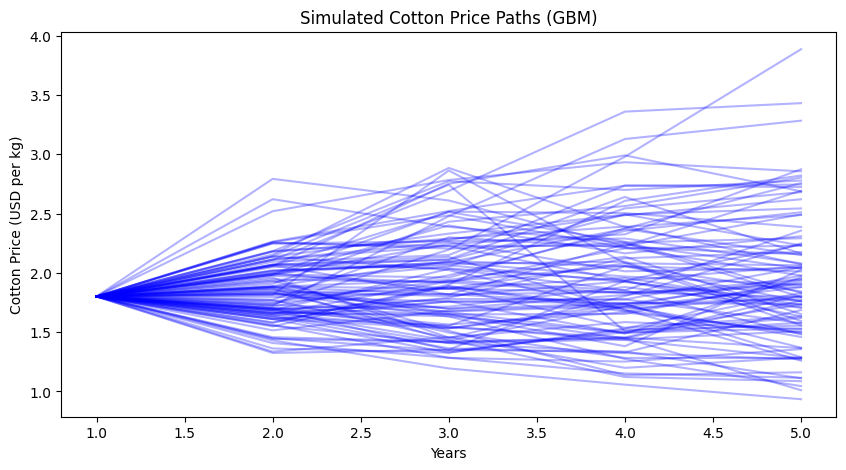

In [22]:
# Plot Cotton Price Simulations
plt.figure(figsize=(10, 5))
for i in range(100):  # Plot only 100 paths for clarity
    plt.plot(range(1, years + 1), cotton_prices[i, :], alpha=0.3, color='blue')
plt.xlabel("Years")
plt.ylabel("Cotton Price (USD per kg)")
plt.title("Simulated Cotton Price Paths (GBM)")
plt.show()